In [35]:
using QuantumOptics

## BASES

In [ ]:
b = FockBasis(20)

## ESTADOS Y OPERADORES

In [ ]:
a = destroy(b)
at = create(b)

alpha = 1.5
psi = coherentstate(b,alpha)

In [ ]:
rho = tensor(psi,dagger(psi))

In [39]:
println("α=", expect(a,psi))

α=1.4999999999991955 + 0.0im


## COMPOSICIÓN DE ESTADOS

In [ ]:
w_atom = 2
w_field = 1

# 2 niveles visto como espín

b_spin = SpinBasis(1//2) #Base espín 1/2
sp = sigmap(b_spin) #operador creación
sm = sigmam(b_spin) #operador aniquilación

H_atom = w_atom*sp*sm

b_fock = FockBasis(20)
a = destroy(b_fock)
at = create(b_fock)
n = number(b_fock)

H_field = w_field*n

In [ ]:
H_int = tensor(a,sp) + tensor(at,sm) #Aquí estoy componiendo elementos de
                                     #la base de Fock y de espín 1/2

In [ ]:
b = tensor(b_fock,b_spin) #base del espacio compuesto
H = embed(b,1,H_field) + embed(b,2,H_atom) + H_int #No sé qué hacen el 1 y el 2

#si no, también puedo usar operadores identidad

In [ ]:
psi0 = tensor(fockstate(b_fock,1),spindown(b_spin))
#Segundo (creo, mirar esto) estado del espacio de fock y el estado con espín para abajo

### EVOLUCIÓN TEMPORAL
Hay diferentes tipos de evolución temporal. SE, ME y MC

In [44]:
#timeevolution.schroedinger(tspan, psi0, H)
#timeevolution.master(tspan, psi0/rho0, H, J)
#timeevolution.mcwf(tspan, psi0, H, J)

#Me crean dos vectores, tout y states

### SCHRÖDINGER EQUATION

In [45]:
tspan = [0:0.05:5;] #De 0 a 5 en pasos de 0.05, vector columna
tout, ψt = timeevolution.schroedinger(tspan, psi0, H);

In [46]:
using PyPlot

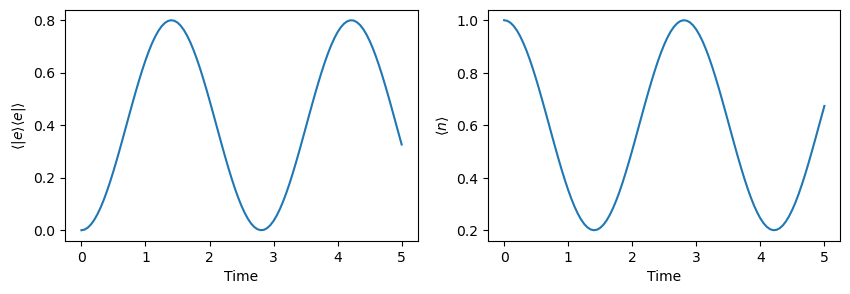

In [ ]:
using PyPlot

figure(figsize=[10, 3])

subplot(1, 2, 1)
xlabel("Time")
ylabel(L"$\langle |e\rangle \langle e| \rangle$")
plot(tout, real(expect(2, sp*sm, ψt))) #Es lo mismo que tspan

subplot(1, 2, 2)
xlabel("Time")
ylabel(L"$\langle n \rangle$")
plot(tout, real(expect(1, n, ψt)));
display(gcf())

### MASTER EQUATION
tbc ...